# visualization

## resizing image before and after

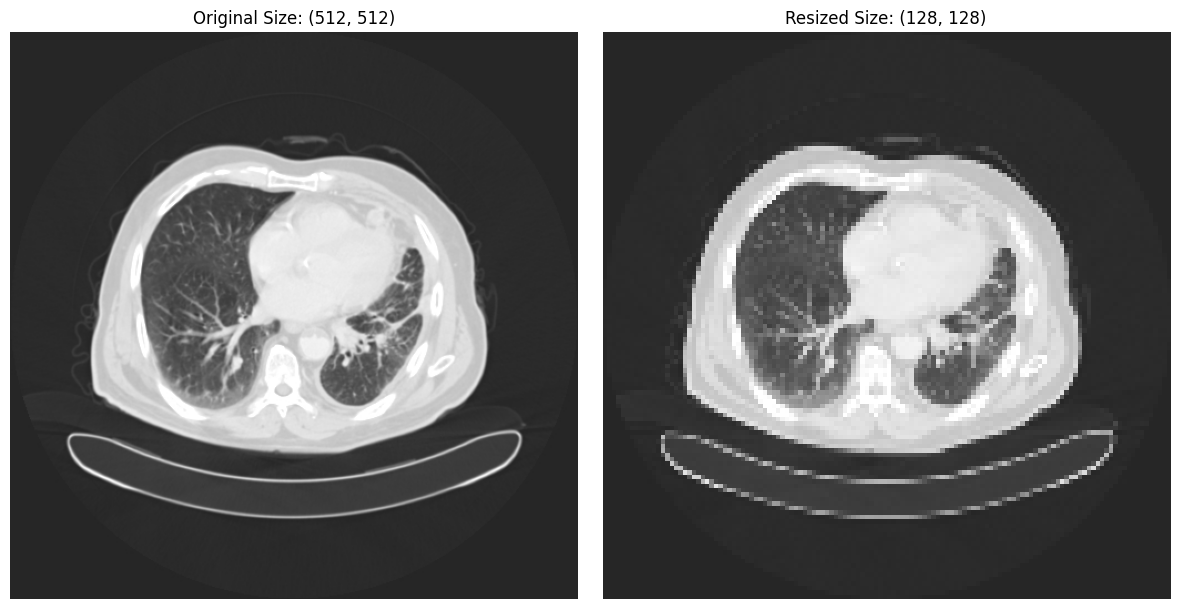

Image Path: original lung cancer dataset\Malignant cases\Malignant case (1).jpg
Original Size: (512, 512) (Height, Width)
Resized Size: (128, 128) (Height, Width)
----------------------------------------


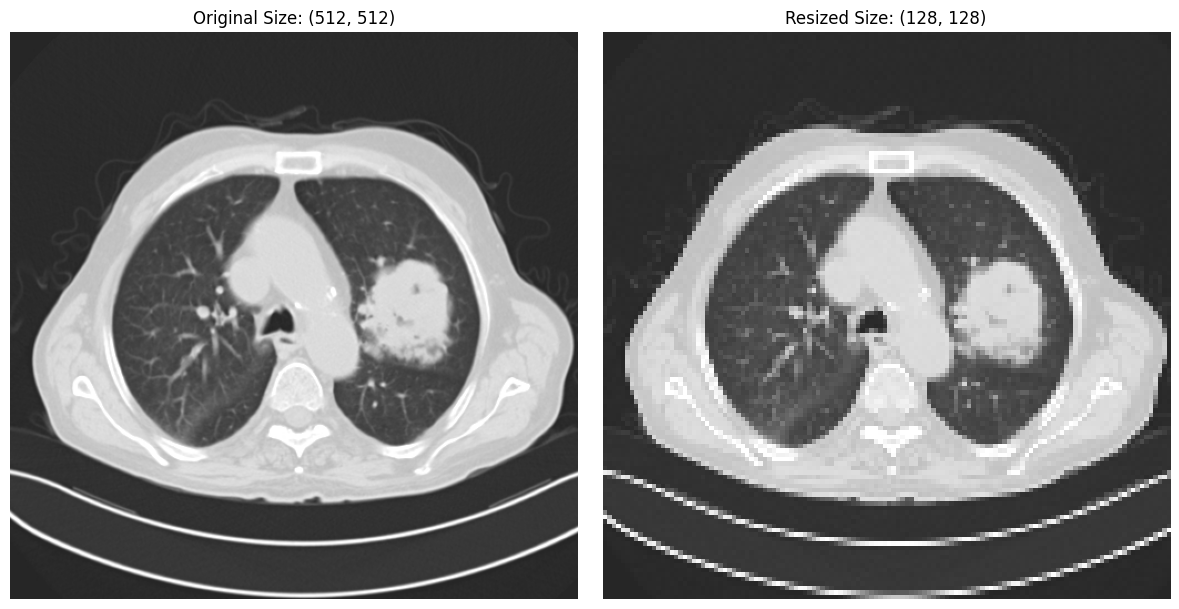

Image Path: original lung cancer dataset\Malignant cases\Malignant case (10).jpg
Original Size: (512, 512) (Height, Width)
Resized Size: (128, 128) (Height, Width)
----------------------------------------


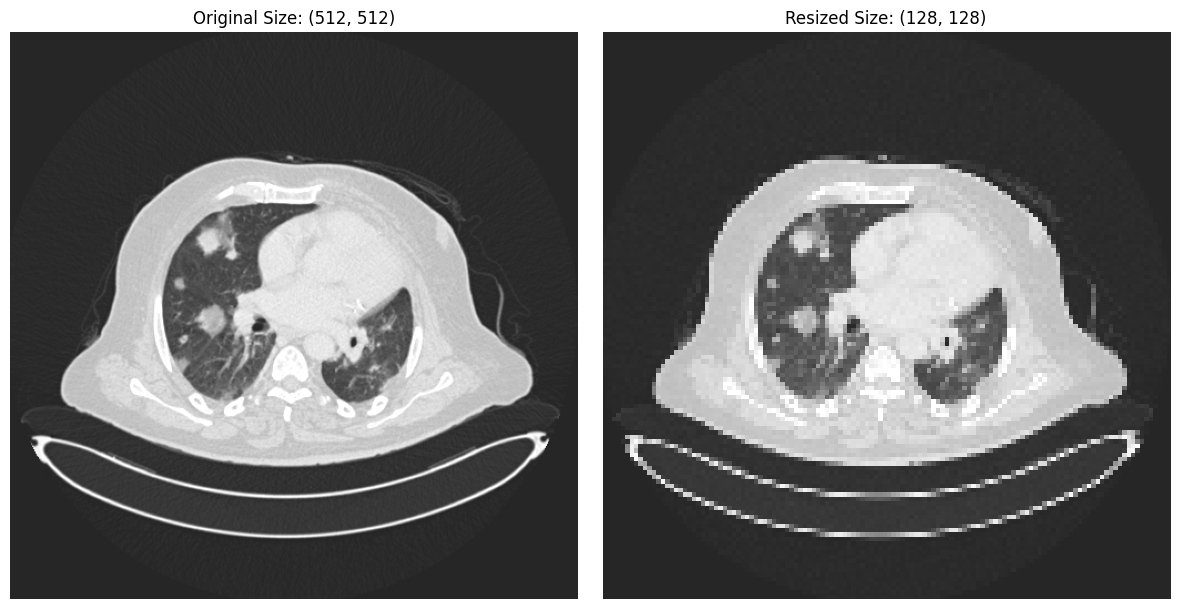

Image Path: original lung cancer dataset\Malignant cases\Malignant case (100).jpg
Original Size: (512, 512) (Height, Width)
Resized Size: (128, 128) (Height, Width)
----------------------------------------


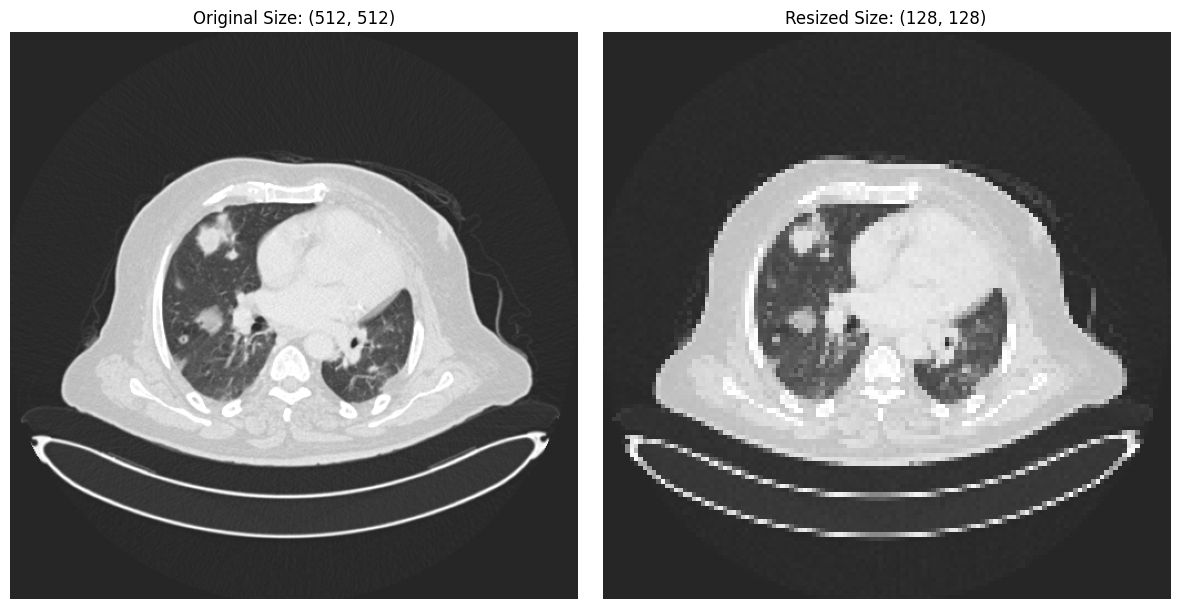

Image Path: original lung cancer dataset\Malignant cases\Malignant case (101).jpg
Original Size: (512, 512) (Height, Width)
Resized Size: (128, 128) (Height, Width)
----------------------------------------


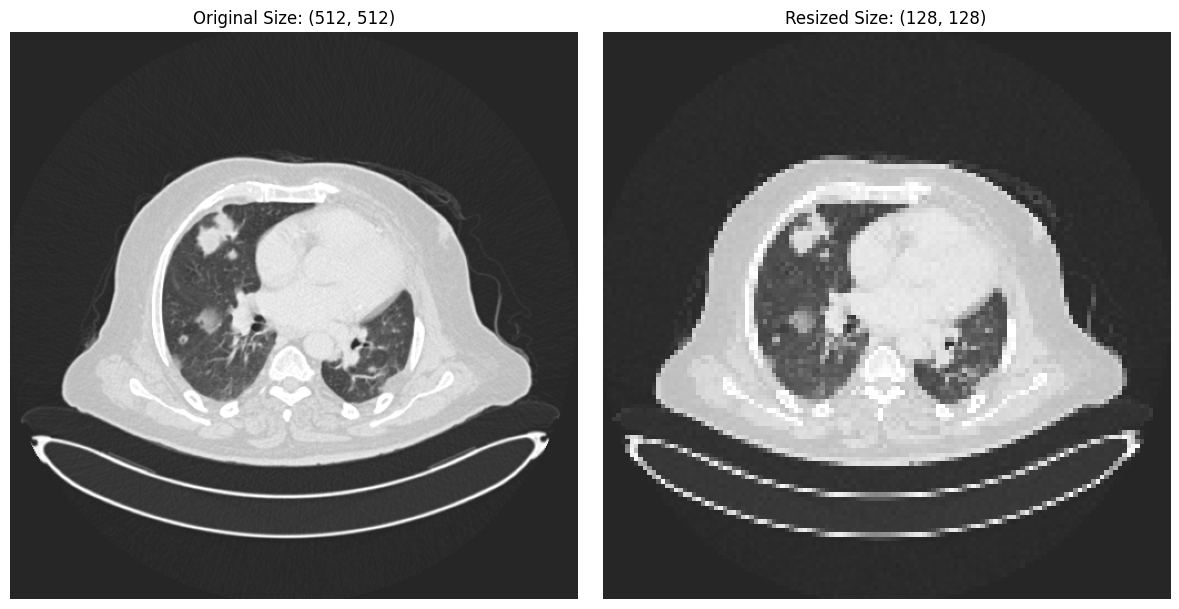

Image Path: original lung cancer dataset\Malignant cases\Malignant case (102).jpg
Original Size: (512, 512) (Height, Width)
Resized Size: (128, 128) (Height, Width)
----------------------------------------


In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'dataset_labels.csv'  # Replace with the actual path to your dataset CSV
df = pd.read_csv(dataset_path)

# Check if the dataset contains the required column
assert 'image_path' in df.columns, "Dataset must contain 'image_path' column."

# Parameters for resizing
image_size = (128, 128)  # Target size for resizing

# Process and visualize the first few images
for index, row in df.head(5).iterrows():  # Adjust `.head(5)` to visualize more/less images
    image_path = row['image_path']
    
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Get original dimensions
    original_size = image.shape[:2]  # (height, width)

    # Resize the image
    resized_image = cv2.resize(image, image_size)
    resized_size = resized_image.shape[:2]  # (height, width)

    # Convert BGR (OpenCV default) to RGB for matplotlib
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Plot original and resized images
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title(f"Original Size: {original_size}")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image_rgb)
    plt.title(f"Resized Size: {resized_size}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Print the sizes for reference
    print(f"Image Path: {image_path}")
    print(f"Original Size: {original_size} (Height, Width)")
    print(f"Resized Size: {resized_size} (Height, Width)")
    print("-" * 40)


## grayscale conversion dimension before and after

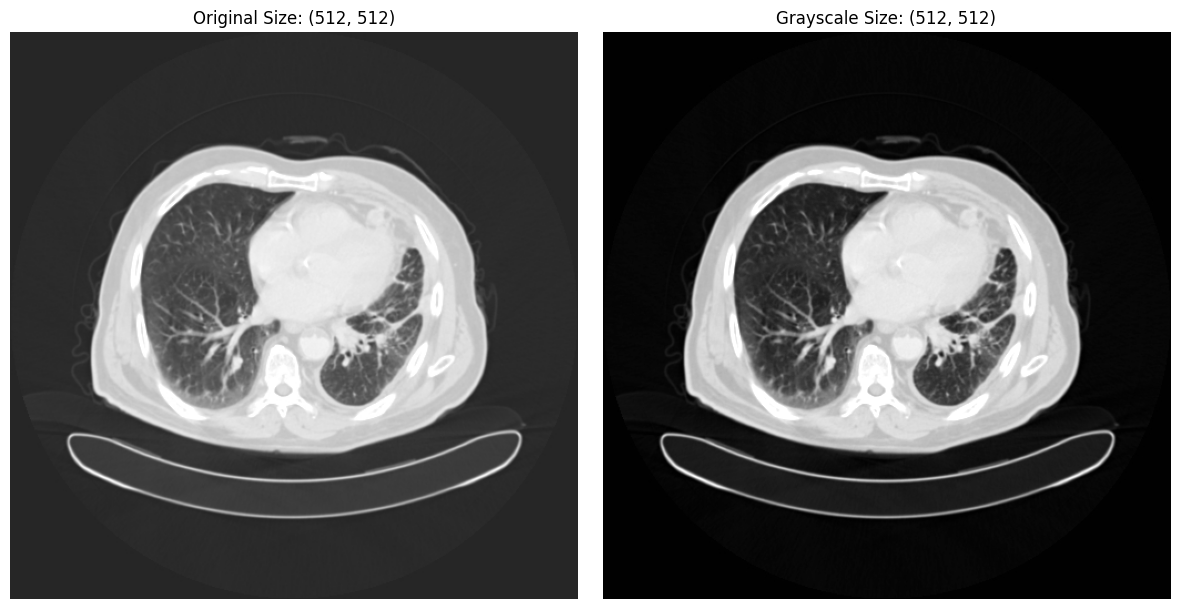

Image Path: original lung cancer dataset\Malignant cases\Malignant case (1).jpg
Original Size: (512, 512) (Height, Width, Channels)
Grayscale Size: (512, 512) (Height, Width)
----------------------------------------


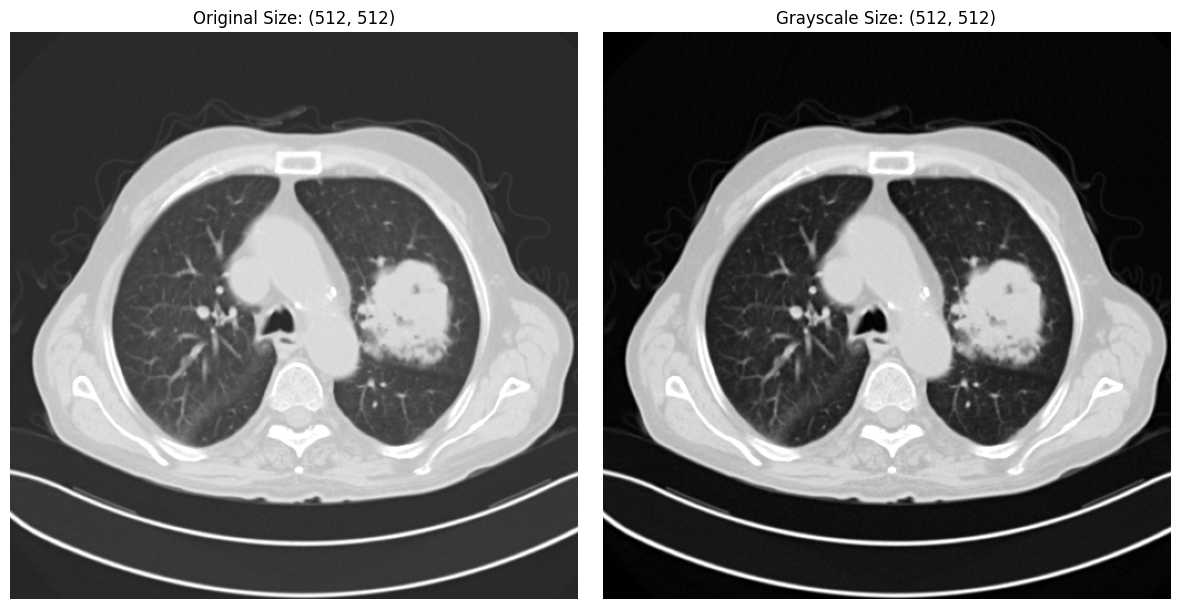

Image Path: original lung cancer dataset\Malignant cases\Malignant case (10).jpg
Original Size: (512, 512) (Height, Width, Channels)
Grayscale Size: (512, 512) (Height, Width)
----------------------------------------


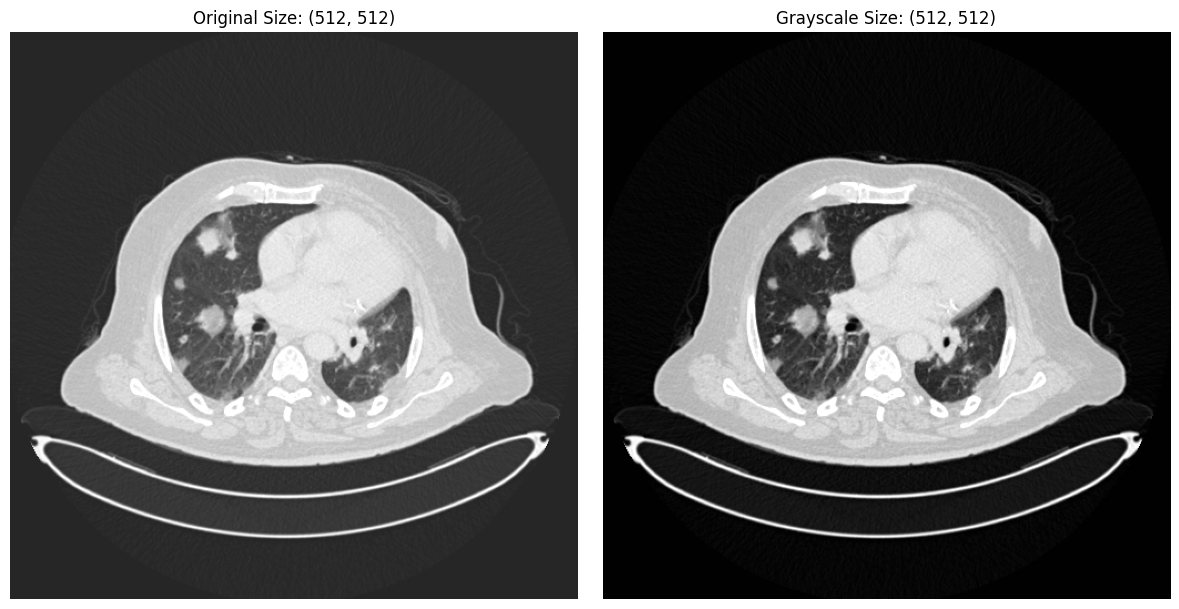

Image Path: original lung cancer dataset\Malignant cases\Malignant case (100).jpg
Original Size: (512, 512) (Height, Width, Channels)
Grayscale Size: (512, 512) (Height, Width)
----------------------------------------


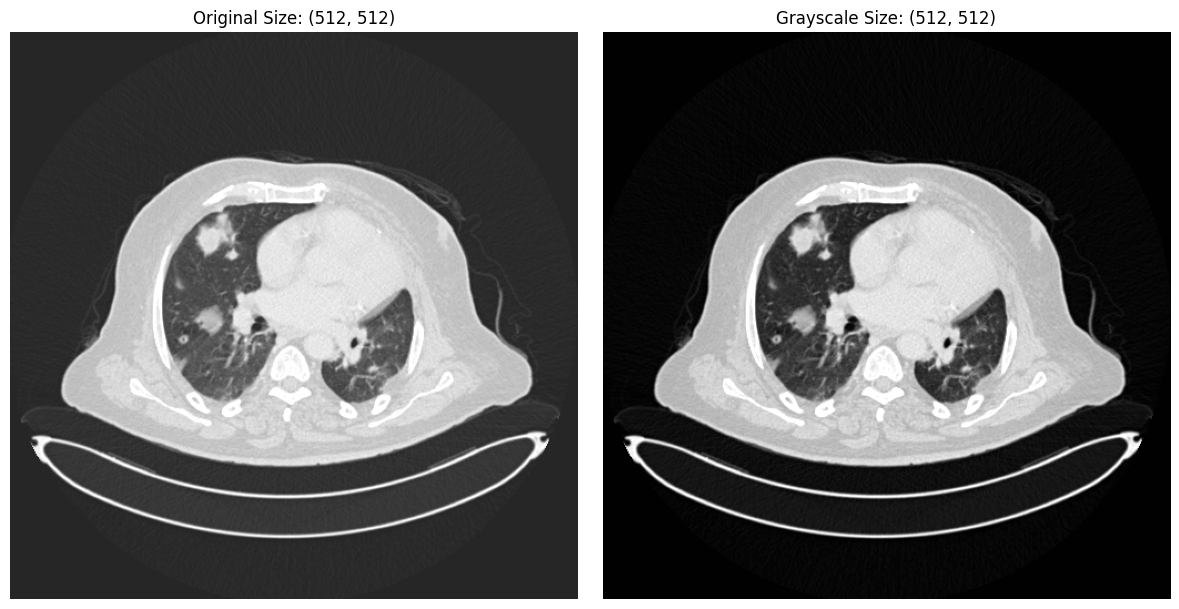

Image Path: original lung cancer dataset\Malignant cases\Malignant case (101).jpg
Original Size: (512, 512) (Height, Width, Channels)
Grayscale Size: (512, 512) (Height, Width)
----------------------------------------


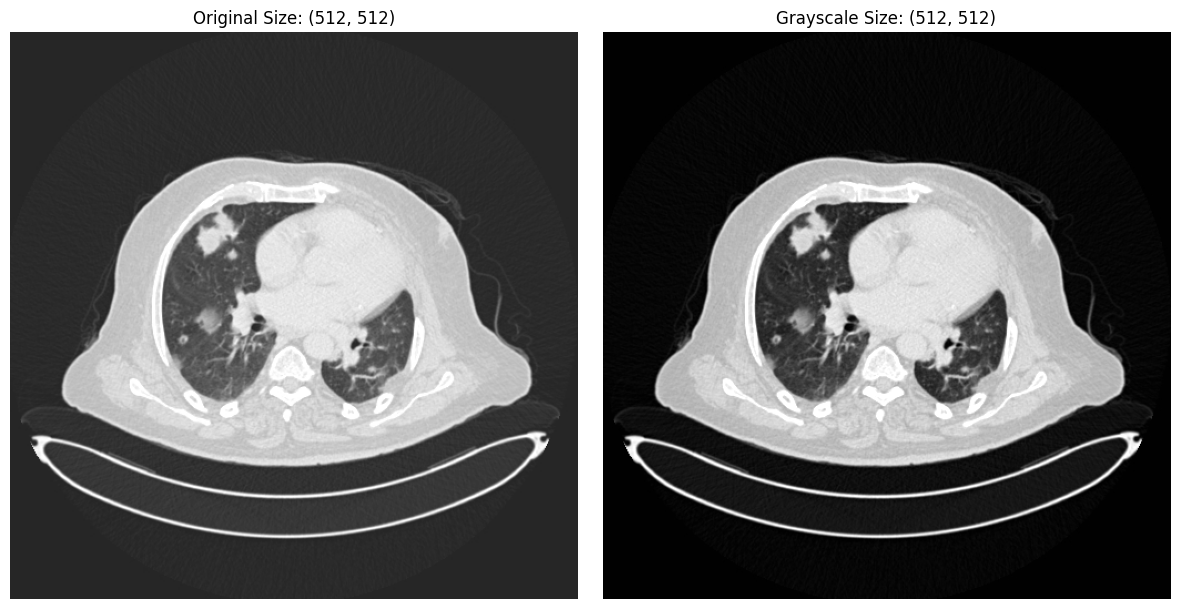

Image Path: original lung cancer dataset\Malignant cases\Malignant case (102).jpg
Original Size: (512, 512) (Height, Width, Channels)
Grayscale Size: (512, 512) (Height, Width)
----------------------------------------


In [4]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'dataset_labels.csv'  # Replace with the actual path to your dataset CSV
df = pd.read_csv(dataset_path)

# Check if the dataset contains the required column
assert 'image_path' in df.columns, "Dataset must contain 'image_path' column."

# Process and visualize the first few images
for index, row in df.head(5).iterrows():  # Adjust `.head(5)` for more/less images
    image_path = row['image_path']
    
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Get original dimensions
    original_size = image.shape[:2]  # (height, width)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_size = gray_image.shape[:2]  # Grayscale will still have (height, width)

    # Convert BGR (OpenCV default) to RGB for matplotlib display
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot original and grayscale images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title(f"Original Size: {original_size}")
    plt.axis("off")

    # Grayscale Image
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f"Grayscale Size: {gray_size}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Print the sizes for reference
    print(f"Image Path: {image_path}")
    print(f"Original Size: {original_size} (Height, Width, Channels)")
    print(f"Grayscale Size: {gray_size} (Height, Width)")
    print("-" * 40)


## normalization

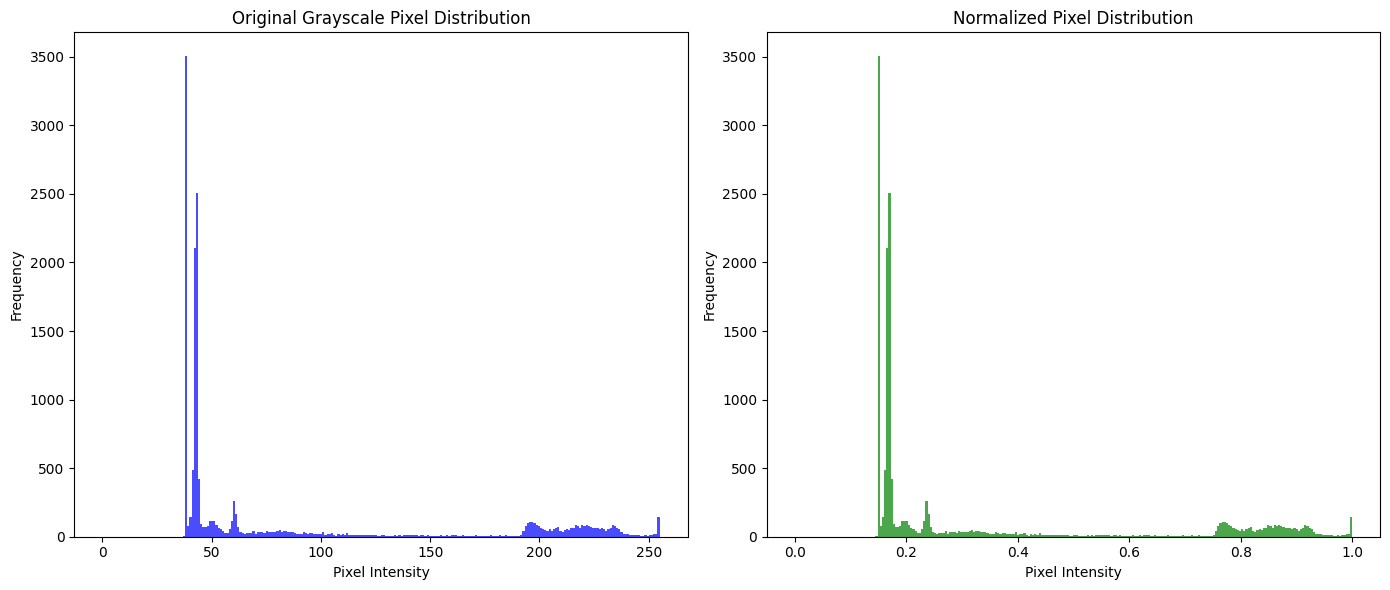

Original image max pixel value: 255
Original image min pixel value: 37
Normalized image max pixel value: 1.0
Normalized image min pixel value: 0.1450980392156863


In [5]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'dataset_labels.csv'  # Replace with the actual path to your dataset CSV
df = pd.read_csv(dataset_path)

# Check if the dataset contains the required column
assert 'image_path' in df.columns, "Dataset must contain 'image_path' column."

# Parameters
image_size = (128, 128)  # Resizing dimensions

# Process a single image for visualization
for index, row in df.head(1).iterrows():  # Visualize using the first image
    image_path = row['image_path']

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Resize the image
    image_resized = cv2.resize(image, image_size)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    # Normalize the image (scaling to [0, 1])
    normalized_image = gray_image / 255.0

    # Plot original grayscale and normalized pixel distributions
    plt.figure(figsize=(14, 6))

    # Original Grayscale Histogram
    plt.subplot(1, 2, 1)
    plt.hist(gray_image.ravel(), bins=256, range=[0, 255], color='blue', alpha=0.7)
    plt.title("Original Grayscale Pixel Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Normalized Histogram
    plt.subplot(1, 2, 2)
    plt.hist(normalized_image.ravel(), bins=256, range=[0, 1], color='green', alpha=0.7)
    plt.title("Normalized Pixel Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    print(f"Original image max pixel value: {np.max(gray_image)}")
    print(f"Original image min pixel value: {np.min(gray_image)}")
    print(f"Normalized image max pixel value: {np.max(normalized_image)}")
    print(f"Normalized image min pixel value: {np.min(normalized_image)}")


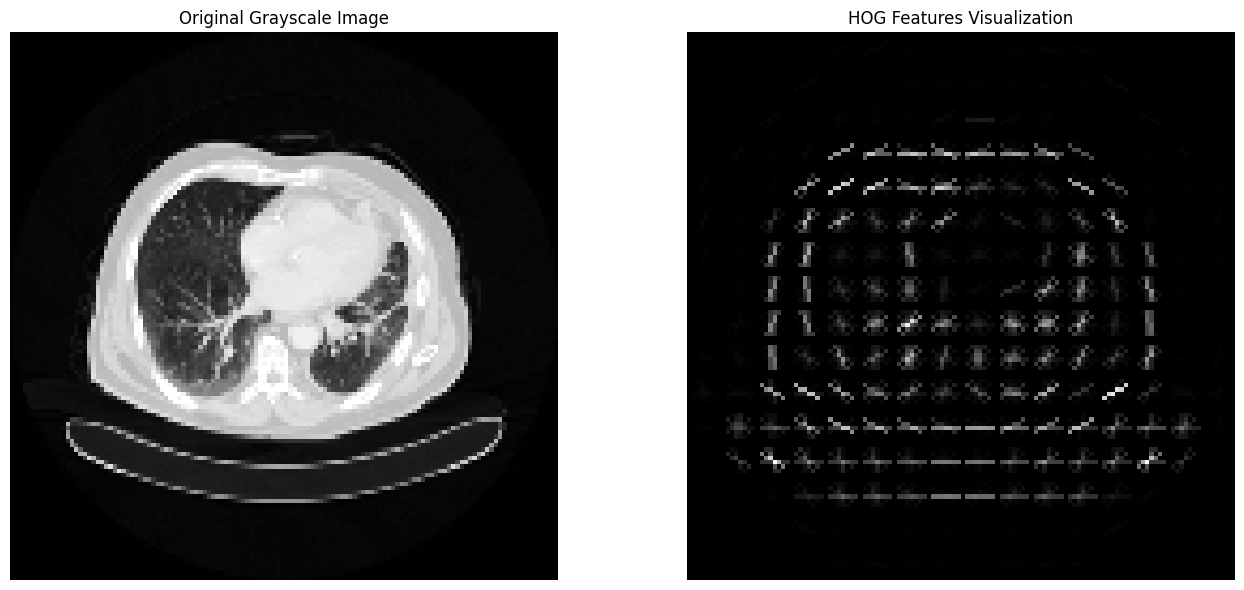

Number of HOG features: 8100


In [6]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the dataset
dataset_path = 'dataset_labels.csv'  # Replace with the actual path to your dataset CSV
df = pd.read_csv(dataset_path)

# Check if the dataset contains the required column
assert 'image_path' in df.columns, "Dataset must contain 'image_path' column."

# Parameters
image_size = (128, 128)  # Resizing dimensions
orientations = 9  # Number of orientation bins for HOG
pixels_per_cell = (8, 8)  # Size of the cell
cells_per_block = (2, 2)  # Number of cells per block

# Process a single image for visualization
for index, row in df.head(1).iterrows():  # Visualize using the first image
    image_path = row['image_path']

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Resize the image
    image_resized = cv2.resize(image, image_size)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    # Compute HOG features and HOG visualization
    hog_features, hog_image = hog(
        gray_image,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=True
    )

    # Plot original grayscale and HOG visualizations
    plt.figure(figsize=(14, 6))

    # Original Grayscale Image
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    # HOG Image
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features Visualization")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Print HOG feature details
    print(f"Number of HOG features: {len(hog_features)}")
    break  # Stop after the first image


# no of images in original dataset

C:\Users\shett\AppData\Local\Temp\ipykernel_6548\919187662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


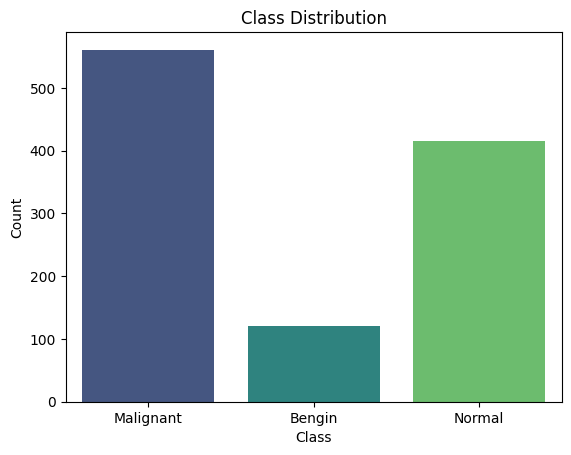

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='label', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# images in train test and validate datasets

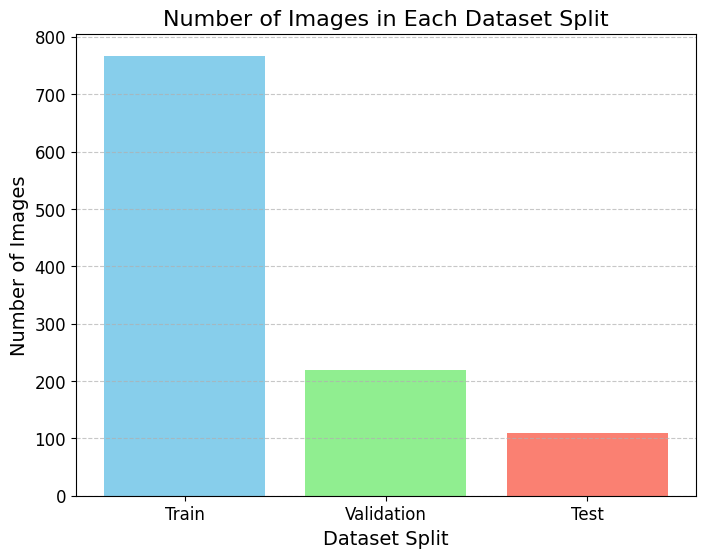

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the split datasets
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Count the number of images in each split
split_counts = {
    'Train': len(train_data),
    'Validation': len(val_data),
    'Test': len(test_data),
}

# Plot the counts as a bar graph
plt.figure(figsize=(8, 6))
plt.bar(split_counts.keys(), split_counts.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Number of Images in Each Dataset Split', fontsize=16)
plt.xlabel('Dataset Split', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


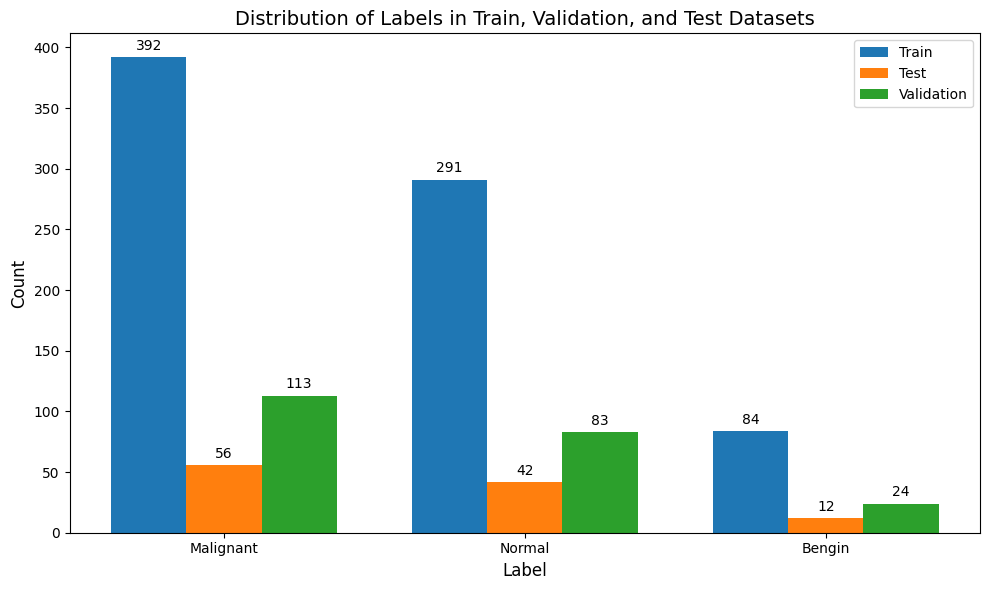

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the train, validation, and test datasets
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Count the labels in each dataset
train_counts = train_data['label'].value_counts()
val_counts = val_data['label'].value_counts()
test_counts = test_data['label'].value_counts()

# Combine the counts into a single DataFrame for easy plotting
data = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).fillna(0)  # Fill missing labels with 0

# Plot the bar graph
labels = data.index
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, data['Train'], width, label='Train')
bars2 = ax.bar(x, data['Test'], width, label='Test')
bars3 = ax.bar(x + width, data['Validation'], width, label='Validation')

# Add labels, title, and legend
ax.set_xlabel('Label', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Labels in Train, Validation, and Test Datasets', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar labels
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_bar_labels(bars1)
add_bar_labels(bars2)
add_bar_labels(bars3)

# Show the plot
plt.tight_layout()
plt.show()


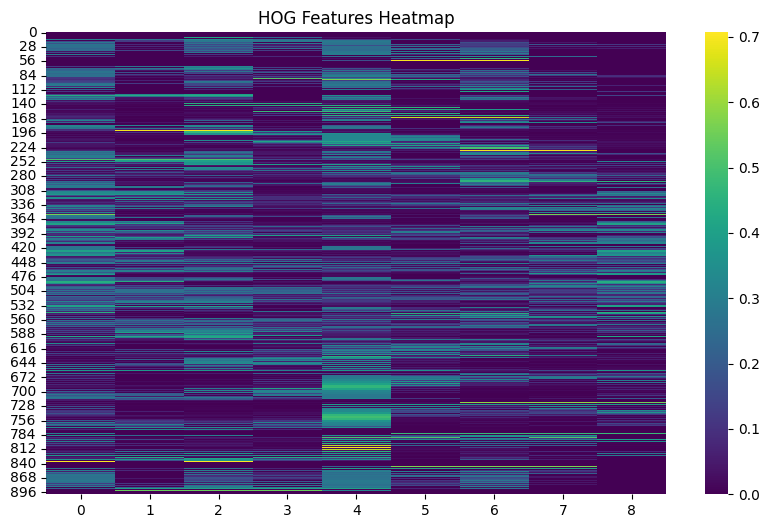

In [10]:
# Assuming `hog_features` is a 1D array from HOG
hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True
)

# Reshape features for heatmap
hog_feature_matrix = hog_features.reshape(-1, 9)  # Adjust to your HOG feature shape

plt.figure(figsize=(10, 6))
sns.heatmap(hog_feature_matrix, cmap='viridis')
plt.title("HOG Features Heatmap")
plt.show()



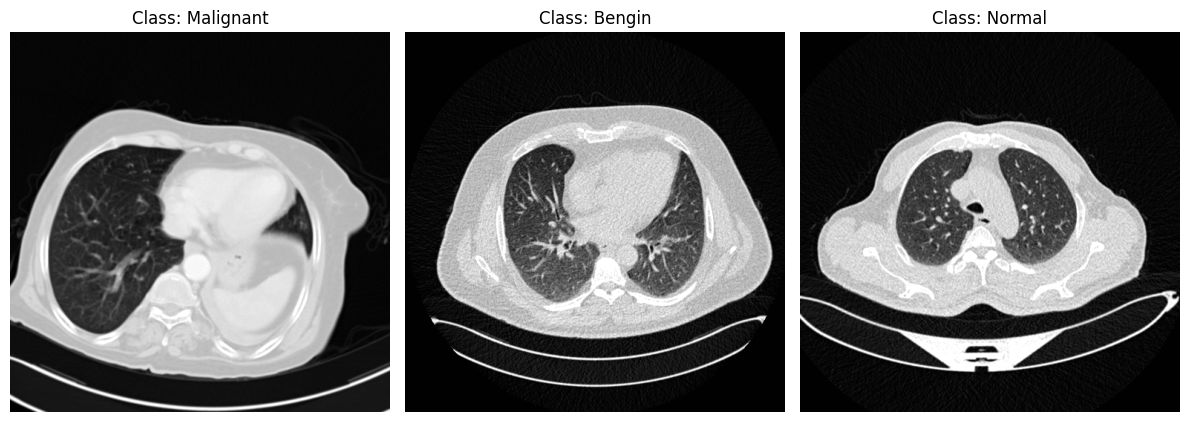

In [11]:
import random

# Display a few images from each class
classes = df['label'].unique()
plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    class_images = df[df['label'] == cls]['image_path'].values
    image_path = random.choice(class_images)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, len(classes), i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.tight_layout()
plt.show()
